In [1]:
# this scripts downloads all the timeseries data which is five hours on either side of the event
# author: Kaushik Pradhan (kpradhan@miners.utep.edu)
# last updated - 05/10/2024

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import os
import sys
import obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from mpl_toolkits.basemap import Basemap

In [3]:
# read the csv file from a link - magnitude Mw 6.5+ earthquakes from 2017 to today
usgs_6_5_plus = 'https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2017-01-01%2000:00:00&endtime=2024-02-19%2023:59:59&minmagnitude=6.5&eventtype=earthquake&orderby=time'
data_usgs_6_5_plus = pd.read_csv(usgs_6_5_plus)

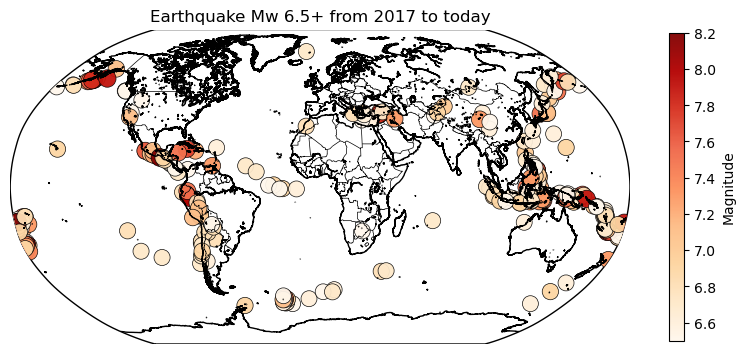

In [4]:
plt.figure(figsize=(10, 8))
map = Basemap(projection='robin', resolution='i', lat_0=0, lon_0=0)

map.drawcoastlines()
map.drawcountries()

x, y = map(data_usgs_6_5_plus['longitude'], data_usgs_6_5_plus['latitude'])
sc = map.scatter(x, y, s=data_usgs_6_5_plus['mag']*20.0, c=data_usgs_6_5_plus['mag'], cmap='OrRd', alpha=0.95, edgecolors='k', linewidth=0.5)

plt.title('Earthquake Mw 6.5+ from 2017 to today')

cbar = plt.colorbar(sc, shrink=0.5)
cbar.set_label('Magnitude')

plt.show()

In [5]:
client = Client('texnet')

#create an empty numpy array to store all the data files
texnet_recording_data_store = np.zeros((1, len(data_usgs_6_5_plus), 36000))

for i in range(len(data_usgs_6_5_plus)):
    eq_time = UTCDateTime(data_usgs_6_5_plus.iloc[i]['time'])
    starttime = eq_time - 5 * 3600  # 5 hours before the event
    endtime = eq_time + 5 * 3600

    stream = client.get_waveforms('TX', 'PB28', '00', 'HHZ', starttime, endtime)

    data = stream[0].data[:36000]  # Truncate the data array to match the desired shape

    texnet_recording_data_store[0, i, :] = data

# save the texnet_recording_data_store to a file to retire it later
np.save('texnet_recording_data_store.npy', texnet_recording_data_store)

KeyboardInterrupt: 